# Imports

In [1]:
import numpy as np
import pandas as pd
import pathlib
from PIL import Image
import ast
import os
os.environ['MPLCONFIGDIR'] = "/Image-1"
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-f9xh7077 because the default path (/Image-1) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# [OPTIONAL] Working with DICOM files

In [2]:
# Install libraries for DICOM files

# #!wget 'https://anaconda.org/conda-forge/gdcm/2.8.9/download/linux-64/gdcm-2.8.9-py37h500ead1_1.tar.bz2' -q
# #!conda install 'gdcm-2.8.9-py37h500ead1_1.tar.bz2' -c conda-forge -y
# !conda install -c conda-forge gdcm -y
# !conda install -c conda-forge pydicom -y

In [3]:
# import pydicom
# from pydicom.pixel_data_handlers.util import apply_voi_lut

In [4]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# CONVERTING DICOM FILES TO NP ARRAYS PROPERLY
# Ref : https://www.kaggle.com/raddar/convert-dicom-to-np-array-the-correct-way

# def dicom2arr(path, voi_lut = True, fix_monochrome = True):

#     dicom = pydicom.read_file(path)
    
#     # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to 
#     # "human-friendly" view
#     if voi_lut:
#         arr = apply_voi_lut(dicom.pixel_array, dicom)
#     else:
#         arr = dicom.pixel_array
    
#     # depending on this value, X-ray may look inverted - fix that:
#     if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
#         arr = np.amax(arr) - arr
        
#     arr = arr - np.min(arr)
#     arr = arr / np.max(arr)
#     arr = (arr * 255).astype(np.uint8)
        
#     return arr

# [OPTIONAL] Convert dcm to jpg
I did this for two reasons:
1. Because TF OD API explicitly states so in their docs:
"Dataset Requirements
For every example in your dataset, you should have the following information: An RGB image for the dataset **encoded as jpeg or png**.
2. Because it's easier to work with jpg's.

In [5]:
# def resize(array, size, keep_ratio=False, resample=Image.LANCZOS):
#     # Original from: https://www.kaggle.com/xhlulu/vinbigdata-process-and-resize-to-image
#     im = Image.fromarray(array)
    
#     if keep_ratio:
#         im.thumbnail((size, size), resample)
#     else:
#         im = im.resize((size, size), resample)
    
#     return im

In [6]:
# image_id = []
# dim0 = []
# dim1 = []
# splits = []

# for split in ['test', 'train']:
#     save_dir = f'/kaggle/tmp/{split}/'

#     os.makedirs(save_dir, exist_ok=True)
    
#     for dirname, _, filenames in os.walk(f'../input/siim-covid19-detection/{split}'):
#         for file in filenames:
#             # set keep_ratio=True to have original aspect ratio
#             xray = dicom2arr(os.path.join(dirname, file))
#             im = resize(xray, size=256)  
#             im.save(os.path.join(save_dir, file.replace('dcm', 'jpg')))

#             image_id.append(file.replace('.dcm', ''))
#             dim0.append(xray.shape[0])
#             dim1.append(xray.shape[1])
#             splits.append(split)

In [7]:

# for dirname, _, filenames in os.walk('../input/siim-covid19-resized-to-256px-jpg/train'):
#     for filename in filenames:
#         #print(dirname, filename)
#         path = os.path.join(dirname, filename)
#         #print(path)
#         img= Image.open(path)  
#         image = np.array(img)
#         print(image)
#         print(image.shape)
#         img_arr = dicom2arr(path)
#         print(img_arr)
#         print(np.max(img_arr))
#         print(img_arr.shape)
#         print(type(img_arr))
        


# Install TF Object detection API

### Clone TF models repo

In [8]:
!mkdir /tf/Kostya_working_dir
%cd /tf/Kostya_working_dir

mkdir: cannot create directory ‘/tf/Kostya_working_dir’: File exists
/tf/Kostya_working_dir


In [9]:
# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
    while "models" in pathlib.Path.cwd().parts:
        os.chdir('..')
elif not pathlib.Path('models').exists():
    !git clone --depth 1 https://github.com/tensorflow/models

### Compile and install protobuf

In [10]:
# !wget -O protobuf.zip https://github.com/google/protobuf/releases/download/v3.17.2/protoc-3.17.2-linux-x86_64.zip -q
# !unzip -o protobuf.zip
# !rm protobuf.zip

In [11]:
%cd models/research
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/tf/Kostya_working_dir/models/research
Defaulting to user installation because normal site-packages is not writeable
Processing /tf/Kostya_working_dir/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1654777 sha256=34b054938fd33abd4ca5944d397097d5bdd4b216a5b4d6a5ba76f28b4ae1a6dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-inqa1672/wheels/98/6d/25/da48cbbcf5da0ba5abafbc85e34a70a8728e370ef0de225417
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninst

In [12]:
# !export PATH=/.local/:$PATH

# import sys
# sys.path.append('/.local/')

# !pip install tf_slim

# !echo $PATH

# !whereis numpy

In [13]:
# import sys
# sys.path.append('/.local/')

In [14]:
# !pip install tf_slim

In [15]:
# !echo $PATH

In [16]:
# !whereis numpy

### Run model builder test

In [17]:
!python object_detection/builders/model_builder_tf2_test.py

2021-06-23 10:19:44.607127: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.6.9: /usr/local/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-23 10:19:45.935822: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-23 10:19:45.978604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-23 10:19:45.978949: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-06-23 10:19:45.978991: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937]

In [18]:
import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# The following two imports are for creating TFRecord files
from object_detection.utils import dataset_util
from object_detection.dataset_tools import tf_record_creation_util

# Create annotations

In [19]:
%cd /tf/Kostya_working_dir
!mkdir Annotations

/tf/Kostya_working_dir
mkdir: cannot create directory ‘Annotations’: File exists


In [20]:
%%writefile Annotations/label_map.pbtxt
item {
    id: 1
    name: 'negative'
}

item {
    id: 2
    name: 'typical'
}

item {
    id: 3
    name: 'indeterminate'
}

item {
    id: 4
    name: 'atypical'
}

Overwriting Annotations/label_map.pbtxt


## Join and create final dataframe

### Load both train dataframes

In [21]:
!pwd
path_dcm = '/tf/data/DCM/'
train_image = pd.read_csv(path_dcm + 'train_image_level.csv')
train_study = pd.read_csv(path_dcm + 'train_study_level.csv')
sample_submission = pd.read_csv(path_dcm + 'sample_submission.csv')

/tf/Kostya_working_dir


In [22]:
print(len(train_image))
print(len(train_study))

6334
6054


### NOTES: 
* Some of the values in the **StudyInstanceUID** column in **train_image** are related (point) to several images - therefore there are 6334 images but only 6054 StudyInstanceUID's. (Does it mean that multiple images have identical bboxes and labels and this was done just to save time and space for identical boxes/labels?)
* **StudyInstanceUID** column in **train_image** are identical to the **id** column in **train_study** (but without the _study suffix)

In [23]:
train_study.head()

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852_study,0,1,0,0
1,000c9c05fd14_study,0,0,0,1
2,00292f8c37bd_study,1,0,0,0
3,005057b3f880_study,1,0,0,0
4,0051d9b12e72_study,0,0,0,1


#### Rename columns

In [24]:
train_study['id'] = train_study['id'].str.replace('_study', '')

train_study.rename(columns={'id': 'StudyInstanceUID'}, inplace=True)

train_result = train_image.merge(train_study, on='StudyInstanceUID', how='left')

train_result['id'] = train_result['id'].str.replace('_image', '')

#### Add original dimensions (for scaling)

In [25]:
path_jpg = '/tf/data/JPEG/'
original_dims = pd.read_csv(path_jpg + 'meta.csv')

In [26]:
original_dims.head()

,image_id,dim0,dim1,split
0,a29c5a68b07b,2320,2828,test
1,9850b5470fd6,2330,2382,test
2,8d6dea06a032,2422,3344,test
3,dfc5c09a50bc,1140,1387,test
4,7230234e120a,2318,2383,test


In [27]:
original_dims.rename(columns={'image_id': 'id'}, inplace=True)

train_result_final = train_result.merge(original_dims, on='id', how='left')

In [28]:
train_result_final.head()

,id,boxes,label,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,dim0,dim1,split
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,0,1,0,0,3488,4256,train
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,1,0,0,0,2320,2832,train
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0,1,0,0,2544,3056,train
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,0,0,0,1,3520,4280,train
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,0,1,0,0,2800,3408,train


### Scale bboxes proportionally

In [29]:
train_result_final["boxes"] = train_result_final["boxes"].fillna("[{'x':0, 'y':0, 'width':1, 'height':1}]")

In [30]:
train_result_final["boxes"] = train_result_final["boxes"].apply(lambda x: ast.literal_eval(x))

In [31]:
train_result_final.head()

,id,boxes,label,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,dim0,dim1,split
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,0,1,0,0,3488,4256,train
1,000c3a3f293f,"[{'x': 0, 'y': 0, 'width': 1, 'height': 1}]",none 1 0 0 1 1,ff0879eb20ed,1,0,0,0,2320,2832,train
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0,1,0,0,2544,3056,train
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,0,0,0,1,3520,4280,train
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,0,1,0,0,2800,3408,train


### Convert bboxes coordinates

In [32]:
def unpack_bboxes(df):
    """ go from xmin,ymin,width,height --> xmin,ymin,xmax,ymax """
    for dictionary in df["boxes"]:
        df["xmin"] = dictionary["x"]
        df["ymin"] = dictionary["y"]
        df["xmax"] = dictionary["x"] + dictionary["width"]
        df["ymax"] = dictionary["y"] + dictionary["height"]
    return df

In [33]:
def scale_bbox_coor(df):
    if df['xmin'] != 0:
        df['xmin'] *= (256 / df['dim1'])
        df['xmax'] *= (256 / df['dim1'])
        df['ymin'] *= (256 / df['dim0'])
        df['ymax'] *= (256 / df['dim0'])
    return df

In [34]:
print("Unpacking bboxes into separate columns. This will take ~20 secs")
train_result_final = train_result_final.apply(unpack_bboxes, axis=1)

Unpacking bboxes into separate columns. This will take ~20 secs


In [35]:
train_result_final = train_result_final.apply(scale_bbox_coor, axis=1)

In [36]:
train_result_final.head()

,id,boxes,label,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,dim0,dim1,split,xmin,ymin,xmax,ymax
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,0,1,0,0,3488,4256,train,135.092456,43.391213,200.936764,172.679246
1,000c3a3f293f,"[{'x': 0, 'y': 0, 'width': 1, 'height': 1}]",none 1 0 0 1 1,ff0879eb20ed,1,0,0,0,2320,2832,train,0.000000,0.000000,1.000000,1.000000
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0,1,0,0,2544,3056,train,150.173038,40.508428,201.861192,161.701686
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,0,0,0,1,3520,4280,train,163.229907,158.642423,219.932717,202.569695
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,0,1,0,0,2800,3408,train,193.695144,91.306667,243.472922,193.706667


### Add classes (str and num)

In [37]:
labels_dict = {'Negative for Pneumonia': ["negative", 1], 'Typical Appearance': ["typical", 2], 'Indeterminate Appearance': ["indeterminate", 3], 'Atypical Appearance': ["atypical", 4]}

In [38]:
def convert_and_combine_classes(df):
    for lbl in labels_dict:
        if df[lbl]:
            df['class'] = labels_dict[lbl][0]
            df['class_num'] = labels_dict[lbl][1]
    return df

In [39]:
train_result_final = train_result_final.apply(convert_and_combine_classes, axis=1)

In [40]:
train_result_final.head()

,id,boxes,label,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,dim0,dim1,split,xmin,ymin,xmax,ymax,class,class_num
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,0,1,0,0,3488,4256,train,135.092456,43.391213,200.936764,172.679246,typical,2
1,000c3a3f293f,"[{'x': 0, 'y': 0, 'width': 1, 'height': 1}]",none 1 0 0 1 1,ff0879eb20ed,1,0,0,0,2320,2832,train,0.000000,0.000000,1.000000,1.000000,negative,1
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0,1,0,0,2544,3056,train,150.173038,40.508428,201.861192,161.701686,typical,2
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,0,0,0,1,3520,4280,train,163.229907,158.642423,219.932717,202.569695,atypical,4
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,0,1,0,0,2800,3408,train,193.695144,91.306667,243.472922,193.706667,typical,2


## Split train images into train/validation datasets

In [41]:
import sklearn
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_result_final, test_size=0.2)

### Discard unnecessary columns

In [42]:
train_df = train_df.filter(['id','class', 'class_num', 'xmin', 'ymin', 'xmax', 'ymax'], axis=1)
val_df = val_df.filter(['id','class', 'class_num', 'xmin', 'ymin', 'xmax', 'ymax'], axis=1)

In [43]:
train_df.head()

,id,class,class_num,xmin,ymin,xmax,ymax
2679,6d0230e7bc33,typical,2,177.544251,106.549888,215.542853,201.278803
3216,82436fda2f12,typical,2,78.079997,79.949683,123.306666,173.231362
6164,f9729a4e5c44,indeterminate,3,11.888050,129.814326,48.372065,202.202412
3371,895ee33c70a1,typical,2,123.568732,49.284490,190.259884,168.205766
3859,9d0c91bd716b,typical,2,137.884332,123.894233,198.182969,211.593487


In [44]:
val_df.head()

,id,class,class_num,xmin,ymin,xmax,ymax
510,139a8476e9de,negative,1,0.000000,0.000000,1.000000,1.000000
2188,58d616c1a4d4,negative,1,0.000000,0.000000,1.000000,1.000000
6268,fd86888c63e2,negative,1,0.000000,0.000000,1.000000,1.000000
2782,7125a29cfb98,indeterminate,3,89.377191,92.144065,116.324557,139.692153
3196,815328f2379c,indeterminate,3,49.826721,131.154343,110.280595,189.230067


### Copy train/validation images

In [45]:
!rm -rf /tf/Kostya_working_dir/JPEG/train
!rm -rf /tf/Kostya_working_dir/JPEG/validation
!mkdir -p /tf/Kostya_working_dir/JPEG/train
!mkdir -p /tf/Kostya_working_dir/JPEG/validation

In [46]:
# !mkdir -p /tf/data/JPEG/entire_dataset
# %cd /tf/data/JPEG/
# !tar xvf train.tar.gz -C entire_dataset

In [47]:
import shutil

original_dataset_path = '/tf/data/JPEG/entire_dataset'

def copy_split_dataset(df, split):
    for _, row in df.iterrows():
        source_file_path = os.path.join(original_dataset_path, (row['id'] + '.jpg'))
        dest_file_path = os.path.join('/tf/Kostya_working_dir/JPEG/' + split, (row['id'] +'.jpg'))
        shutil.copy(source_file_path, dest_file_path)

In [48]:
copy_split_dataset(train_df, 'train')
copy_split_dataset(val_df, 'validation')

In [49]:
print(len(os.listdir('/tf/data/JPEG/entire_dataset')))
print(len(os.listdir('/tf/Kostya_working_dir/JPEG/train/')))
print(len(os.listdir('/tf/Kostya_working_dir/JPEG/validation/')))

6334
5067
1267


#### Create csv files from train/validation sets

In [50]:
train_df.to_csv('train_df.csv', encoding='utf-8')
val_df.to_csv('val_df.csv', encoding='utf-8')

# Create TFRecord files

In [51]:
import io
from collections import namedtuple

def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

In [52]:
def create_tf_example(group, path):
    with tf.io.gfile.GFile(os.path.join(path, '{}'.format(group.filename + '.jpg')), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'])
        xmaxs.append(row['xmax'])
        ymins.append(row['ymin'])
        ymaxs.append(row['ymax'])
        classes_text.append(row['class'].encode('utf8'))
        classes.append(row['class_num'])

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        #'image/height': dataset_util.int64_feature(height),
        #'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        #'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example

In [53]:
df_to_dirnames_dict = {'train': train_df, 'validation': val_df}

dir_path = '/tf/Kostya_working_dir/JPEG/'
for dirname in next(os.walk(dir_path))[1]:
    if dirname in df_to_dirnames_dict:
        writer = tf.io.TFRecordWriter(f'tfrecord_{dirname}.tfrec')
        path = os.path.join(dir_path, dirname)
        examples = df_to_dirnames_dict[dirname]
        grouped = split(examples, 'id')
        for group in grouped:
            tf_example = create_tf_example(group, path)
            writer.write(tf_example.SerializeToString())
        writer.close()

# Using pre-trained models from the zoo

In [54]:
!rm -rf pre-trained-models
!rm -rf models/my_ssd_resnet50_v1_fpn
!rm -rf models/my_efficientdet_d2_coco17_tpu-32

!mkdir pre-trained-models
!mkdir models/my_ssd_resnet50_v1_fpn
!mkdir models/my_efficientdet_d2_coco17_tpu-32

In [55]:
##!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz  
# !tar xvf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz --directory=pre-trained-models

In [56]:
#!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d2_coco17_tpu-32.tar.gz
!tar xvf efficientdet_d2_coco17_tpu-32.tar.gz --directory=pre-trained-models

efficientdet_d2_coco17_tpu-32/
efficientdet_d2_coco17_tpu-32/checkpoint/
efficientdet_d2_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
efficientdet_d2_coco17_tpu-32/checkpoint/checkpoint
efficientdet_d2_coco17_tpu-32/checkpoint/ckpt-0.index
efficientdet_d2_coco17_tpu-32/pipeline.config
efficientdet_d2_coco17_tpu-32/saved_model/
efficientdet_d2_coco17_tpu-32/saved_model/saved_model.pb
efficientdet_d2_coco17_tpu-32/saved_model/assets/
efficientdet_d2_coco17_tpu-32/saved_model/variables/
efficientdet_d2_coco17_tpu-32/saved_model/variables/variables.data-00000-of-00001
efficientdet_d2_coco17_tpu-32/saved_model/variables/variables.index


In [57]:
# !pwd
# !cp pre-trained-models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/pipeline.config models/my_ssd_resnet50_v1_fpn

In [58]:
# !cp pre-trained-models/efficientdet_d2_coco17_tpu-32/pipeline.config models/my_efficientdet_d2_coco17_tpu-32

# At this point — go open and edit models/my_ssd_resnet50_v1_fpn/pipeline.config file

### Use uploaded pipeline.config (if available)

In [59]:
!cp Reserves/efficientdet_d2_coco17_tpu-32/pipeline.config models/my_efficientdet_d2_coco17_tpu-32

## Training our model

In [60]:
# !cp models/research/object_detection/model_main_tf2.py .
# !python model_main_tf2.py --model_dir=models/my_ssd_resnet50_v1_fpn --pipeline_config_path=models/my_ssd_resnet50_v1_fpn/pipeline.config

In [61]:
!pwd

/tf/Kostya_working_dir


In [62]:
!cp models/research/object_detection/model_main_tf2.py .

In [63]:
!python model_main_tf2.py --model_dir=models/my_efficientdet_d2_coco17_tpu-32 --pipeline_config_path=models/my_efficientdet_d2_coco17_tpu-32/pipeline.config

2021-06-23 10:20:33.510635: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-23 10:20:35.063985: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-23 10:20:35.107149: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-23 10:20:35.107559: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-06-23 10:20:35.107605: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NU

### Export trained model

In [64]:
!pwd
!cp models/research/object_detection/exporter_main_v2.py /tf/Kostya_working_dir

/tf/Kostya_working_dir


In [65]:
!ls

 Annotations
 JPEG
 Models_config_files
 Models_outputs
 Reserves
 efficientdet_d2_coco17_tpu-32.tar.gz
 exported-models
 exporter_main_v2.py
 model_main_tf2.py
 models
 pre-trained-models
 readme.txt
'siim-covid-19-v-2-6-(Kostya_version).ipynb'
 siim_covid-19_TFRecords_and_Keras.ipynb
 ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
 tfrecord_train.tfrec
 tfrecord_validation.tfrec
 train_df.csv
 val_df.csv


In [66]:
# !python exporter_main_v2.py --input_type image_tensor --pipeline_config_path models/my_ssd_resnet50_v1_fpn/pipeline.config --trained_checkpoint_dir models/my_ssd_resnet50_v1_fpn/ --output_directory exported-models/my_model

In [67]:
# Takes ~1'20"
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path models/my_efficientdet_d2_coco17_tpu-32/pipeline.config --trained_checkpoint_dir models/my_efficientdet_d2_coco17_tpu-32/ --output_directory exported-models/my_model

2021-06-23 11:15:30.424867: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-23 11:15:33.466294: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-23 11:15:33.539736: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-23 11:15:33.540170: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-06-23 11:15:33.540300: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NU

# Predict on the test set

### Untar test set archive

In [68]:
# %cd /tf/data/JPEG
# !mkdir test
# !tar xvf test.tar.gz -C test

In [69]:
len(os.listdir('/tf/data/JPEG/test'))

1263

In [70]:
!pwd

/tf/Kostya_working_dir


### Create test_df from test set

In [71]:
test_filenames = []
for filename in os.listdir('/tf/data/JPEG/test'):
    test_filenames.append(filename)

test_df = pd.DataFrame(test_filenames, columns=['id'])

In [72]:
test_df

,id
0,37c6c0aee54b.jpg
1,91558723b2cd.jpg
2,e49489fcf5c0.jpg
3,f1b66ff8f4eb.jpg
4,16972e92e827.jpg
...,...
1258,4040afec3ee4.jpg
1259,620191dbdfa4.jpg
1260,503a6e0884c6.jpg
1261,3dcdfc352a06.jpg


In [73]:
sample_submission.head()

,id,PredictionString
0,00188a671292_study,negative 1 0 0 1 1
1,004bd59708be_study,negative 1 0 0 1 1
2,00508faccd39_study,negative 1 0 0 1 1
3,006486aa80b2_study,negative 1 0 0 1 1
4,00655178fdfc_study,negative 1 0 0 1 1


In [74]:
sample_submission.loc[sample_submission['id'] == '006486aa80b2_study'].index[0]

3

#### Look up unique suffixes in sample_submission

In [75]:
def get_unique_suffixes_in_images(df):
    suffixes = set()
    for index, row in df.iterrows():
        suffixes.add(row['id'][-6:])
    return suffixes

In [76]:
get_unique_suffixes_in_images(sample_submission)

{'_image', '_study'}

## Load saved model

In [77]:
import time

PATH_TO_SAVED_MODEL = "exported-models/my_model/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...

Done! Took 19.97804045677185 seconds


In [78]:
%cd /tf/Kostya_working_dir/
PATH_TO_LABELS = 'Annotations/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

/tf/Kostya_working_dir


### This function is only for testing purposes - it loads just a few sample images

In [79]:
base_path = '/tf/data/JPEG/test/'

def download_images():
    filenames = ['ebaebf6b1e02.jpg', 'e7b2a9418b98.jpg', '127c2b32dd5d.jpg', 'ccc5b63ca96d.jpg', 
                 '83594e6ad0ba.jpg', 'cb75251076c7.jpg']
    image_paths = []
    for filename in filenames:
        image_path = base_path + filename
        image_path = pathlib.Path(image_path)
        image_paths.append(str(image_path))
    return image_paths

IMAGE_PATHS = download_images()

In [80]:
# Pick a number of random files in test set

import random

def pick_n_random_files(n):
    filenames = random.sample(os.listdir(base_path), n)
    image_paths = []
    for filename in filenames:
        image_path = base_path + filename
        image_path = pathlib.Path(image_path)
        image_paths.append(str(image_path))
    return image_paths

In [81]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path).convert('RGB'))

In [115]:
# Takes ~40 sec

#from collections import defaultdict
%matplotlib inline

test_images_predict_dict = {}
# print(IMAGE_PATHS)
for image in os.listdir(base_path):

#IMAGE_PATHS = pick_n_random_files(10)
#for image in IMAGE_PATHS:
    #print('Running inference for {}... '.format(image), end='')

    image_np = load_image_into_numpy_array(base_path + image)
    # print(image)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]
    # print(input_tensor.shape)

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections
    #print(detections)
    
    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    # Try to scale bboxes
    
    detections['detection_boxes'] = 255 * detections['detection_boxes']
    
    # print(f"Number of detection_classes is {len(detections['detection_classes'])}")
    # print(f"Number of detection_scores is {len(detections['detection_scores'])}")
    # print(f"Number of detection_boxes is {len(detections['detection_boxes'])}")
    
    test_images_predict_dict[image] = {}
    test_images_predict_dict[image]['class'] = []
    test_images_predict_dict[image]['bbox'] = []
    
    for ind, score in enumerate(detections['detection_scores']):
        if score > 0.5:
            test_images_predict_dict[image]['class'].append(detections['detection_classes'][ind])
            test_images_predict_dict[image]['bbox'].append(detections['detection_boxes'][ind])
    
    # print(test_images_predict_dict)
    
    # Visualizing the image with detections
#     image_np_with_detections = image_np.copy()
#     #print(image_np_with_detections)
#     vis_util.visualize_boxes_and_labels_on_image_array(
#           image_np_with_detections,
#           detections['detection_boxes'],
#           detections['detection_classes'],
#           detections['detection_scores'],
#           category_index,
#           use_normalized_coordinates=False,
#           max_boxes_to_draw=2,
#           min_score_thresh = 0.50,
#           agnostic_mode=False)

#     plt.figure(figsize=(6, 6))
#     plt.imshow(image_np_with_detections)
#     plt.show()
#     print('Done')

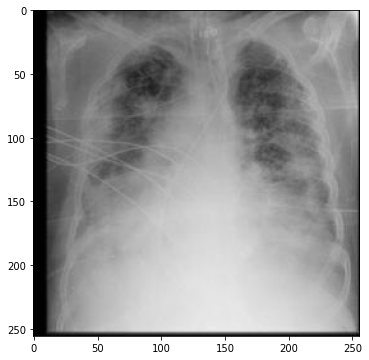

Done


In [83]:
# Takes ~40 sec
%matplotlib inline

# test_images_predict_dict = {}

# print(IMAGE_PATHS)
#for image in os.listdir(base_path):

#IMAGE_PATHS = pick_n_random_files(10)
for image in range(1): #IMAGE_PATHS:
    #print('Running inference for {}... '.format(image), end='')

    image_np = load_image_into_numpy_array(base_path + '37c6c0aee54b.jpg')
    # print(image)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]
    # print(input_tensor.shape)

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections
    #print(detections)
    
    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    # Try to scale bboxes
    
    detections['detection_boxes'] = 255 * detections['detection_boxes']
    
    # print(f"Number of detection_classes is {len(detections['detection_classes'])}")
    # print(f"Number of detection_scores is {len(detections['detection_scores'])}")
    # print(f"Number of detection_boxes is {len(detections['detection_boxes'])}")
    
#     test_images_predict_dict[image] = {}
#     test_images_predict_dict[image]['class'] = []
#     test_images_predict_dict[image]['bbox'] = []
    
#     for ind, score in enumerate(detections['detection_scores']):
#         if score > 0.5:
#             test_images_predict_dict[image]['class'].append(detections['detection_classes'][ind])
#             test_images_predict_dict[image]['bbox'].append(detections['detection_boxes'][ind])
    
    # print(test_images_predict_dict)
    
    # Visualizing the image with detections
    image_np_with_detections = image_np.copy()
    #print(image_np_with_detections)
    vis_util.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=False,
          max_boxes_to_draw=2,
          min_score_thresh = 0.50,
          agnostic_mode=False)

    plt.figure(figsize=(6, 6))
    plt.imshow(image_np_with_detections)
    plt.show()
    print('Done')

In [110]:
test_images_df = pd.DataFrame(test_images_predict_dict).T
#test_images_df = pd.DataFrame(test_images_predict_dict.items(), columns=['id', 'class', 'bbox'])

In [111]:
test_images_df = test_images_df.reset_index()

In [112]:
test_images_df.rename(columns={"index": "id"}, inplace=True)

In [113]:
test_images_df.describe()

,id,class,bbox
count,1263,1263,1263
unique,1263,4,54
top,e5e44940be7a.jpg,[],[]
freq,1,1210,1210


In [114]:
test_images_df[test_images_df['class'].map(lambda d: len(d)) > 0]

,id,class,bbox
1,91558723b2cd.jpg,[2],"[[0.0, 0.0, 246.06796, 248.22679]]"
17,720a67515500.jpg,[2],"[[0.0, 7.5915747, 255.0, 255.0]]"
19,9e78e0ae2f3e.jpg,"[2, 2]","[[0.0, 18.857765, 239.58313, 255.0], [0.0, 0.0..."
25,10d3c965a5b4.jpg,"[2, 2]","[[0.0, 35.523148, 221.22017, 255.0], [33.11927..."
58,ebaebf6b1e02.jpg,"[2, 3]","[[0.0, 13.189882, 246.47168, 255.0], [0.0, 13...."
67,6ca497c845ef.jpg,"[2, 2]","[[0.0, 0.4563707, 255.0, 255.0], [0.0, 0.0, 16..."
69,ad3e33d5f844.jpg,"[2, 2]","[[5.5265985, 35.726185, 230.86525, 255.0], [31..."
134,ae357fad39c2.jpg,"[2, 2]","[[0.0, 28.312304, 226.5756, 255.0], [60.306892..."
147,8d6d32d0822e.jpg,[2],"[[0.0, 1.4055825, 249.17264, 253.6497]]"
155,ac238e67fdc5.jpg,"[2, 2]","[[0.0, 33.64458, 228.86078, 255.0], [26.09985,..."


In [103]:
test_images_df.to_csv('test_images_raw_predictions')

In [116]:
import csv

In [91]:
classes_dict = {1: 'negative', 2: 'typical', 3: 'indeterminate', 4: 'atypical'}

In [105]:
test_images_df['PredictionString'] = ''

for ind, row in test_images_df.iterrows():
    row['id'] = row['id'].replace('.jpg', '')
    
    pred_list = []
    if row['class']:
        # pred_string = ''
        # for elem in row['class']:
        # print(row['class'][0])
        pred_list.append(classes_dict[row['class'][0]])
        for box in row['bbox']:
            #print(box)
            pred_list.extend(map(str, map(int, box)))
            #print(pred_list)
            pred_string = ' '.join(pred_list)
            #print(pred_string)
    else:
        pred_string = 'none 1 0 0 1 1'
    row['PredictionString'] = pred_string

In [106]:
test_images_df.drop(columns=['class', 'bbox'], inplace=True)

In [107]:
test_images_df

,id,PredictionString
0,37c6c0aee54b,typical 0 0 245 252
1,91558723b2cd,typical 0 0 246 248 0 0 242 234
2,e49489fcf5c0,none 1 0 0 1 1
3,f1b66ff8f4eb,none 1 0 0 1 1
4,16972e92e827,negative 1 3 254 254
...,...,...
1258,4040afec3ee4,none 1 0 0 1 1
1259,620191dbdfa4,negative 1 1 255 255
1260,503a6e0884c6,negative 0 0 255 255
1261,3dcdfc352a06,negative 0 3 255 255


In [95]:
test_images_df.iloc[25]

id                                       10d3c965a5b4
PredictionString    typical 0 35 221 255 33 0 243 192
Name: 25, dtype: object

In [108]:
test_images_df.to_csv('predictions_2_')

In [ ]:
sample_submission

# Appendix

# Write all jpg's into a single 'dataset' numpy array

In [ ]:
# dataset = np.ndarray(shape=(len(train_image), 1, 256, 256), dtype=np.float32)

# for dirname, _, filenames in os.walk('../input/siim-covid19-resized-to-256px-jpg/train'):
#     i = 0
#     for filename in filenames:
#         path = os.path.join(dirname, filename)
#         img= Image.open(path)  
#         np_arr_image = np.array(img)
#         dataset[i] = np_arr_image
#         i += 1
        
#         if i % 500 == 0:
#             print(f"{i} images added to dataset")
#     print("All images added to dataset!")

In [ ]:
# dataset.shape